**Import all the relevant libraries for the data analysis**

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Read the data from the file with kaggle link = "https://www.kaggle.com/datasets/imdevskp/corona-virus-report"**

In [142]:
df = pd.read_csv('Downloads/country_wise_latest.csv') #reading from location where file is stored on PC

In [146]:
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


# **DATA CLEANING**

### 1. Removing some columns that will not be used in our analysis and checking data information

In [148]:
df.drop(columns=['Deaths / 100 Recovered','Confirmed last week'],axis = 1,inplace = True)

In [150]:
df.info() #CHECKING DATA INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country/Region         187 non-null    object 
 1   Confirmed              187 non-null    int64  
 2   Deaths                 187 non-null    int64  
 3   Recovered              187 non-null    int64  
 4   Active                 187 non-null    int64  
 5   New cases              187 non-null    int64  
 6   New deaths             187 non-null    int64  
 7   New recovered          187 non-null    int64  
 8   Deaths / 100 Cases     187 non-null    float64
 9   Recovered / 100 Cases  187 non-null    float64
 10  1 week change          187 non-null    int64  
 11  1 week % increase      187 non-null    float64
 12  WHO Region             187 non-null    object 
dtypes: float64(3), int64(8), object(2)
memory usage: 19.1+ KB


**No null columns are found in the data. So we don't use the df.fillna() methods, and move to statistical analysis**

In [152]:
df.describe() #To display the relevant statistics for the data

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,455582.000000,226.320000


### 2.Renaming the columns for ease in analysis

In [154]:
df.rename(columns = {'Deaths / 100 Cases': 'Death Percentage','Recovered / 100 Cases':'Recovery Percentage'},inplace = True)
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Death Percentage,Recovery Percentage,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,201,26.84,Africa


# **DATA ANALYSIS**

### 1.Plotting a pie chart to show the recovered cases, active cases and the deaths count

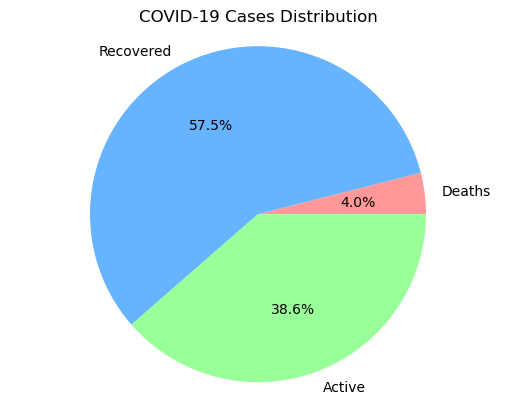

In [157]:
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()
total_active = df['Active'].sum()
labels = ['Deaths', 'Recovered', 'Active']
sizes = [total_deaths, total_recovered, total_active]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
ax.axis('equal')

plt.title("COVID-19 Cases Distribution")
plt.show()

**We see that on avergae 4% of cases have led to death and 57.5% of patients have recovered**




### 2.Creating a dataframe 'high_cases_df' to include only those country records where the number of confirmed cases is more than the average of all confirmed cases.

### This is done to more accurately predict the countries where there are high death and recovery percentages, as countries with less confirmed cases may not show an accurate and full picture of the dataset

In [160]:
mean_confirmed = df['Confirmed'].mean()
high_cases_df = df[df['Confirmed']>mean_confirmed]

In [161]:
high_cases_df #Countries with confirmed cases more than the mean of all confirmed cases of all countries

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Death Percentage,Recovery Percentage,1 week change,1 week % increase,WHO Region
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,36642,28.02,Americas
13,Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,18772,9.05,South-East Asia
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,323729,15.28,Americas
32,Canada,116458,8944,0,107514,682,11,0,7.68,0.00,3533,3.13,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,14894,4.47,Americas
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,53096,26.03,Americas
52,Egypt,92482,4652,34838,52992,420,46,1007,5.03,37.67,4080,4.62,Eastern Mediterranean
61,France,220352,30212,81212,108928,2551,17,267,13.71,36.86,6329,2.96,Europe
65,Germany,207112,9125,190314,7673,445,1,259,4.41,91.89,3787,1.86,Europe
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,324735,28.11,South-East Asia


### 3.Sorting by 'Death Percentage' to get an idea of countries with least and most deaths w.r.t confirmed cases

### Also this is only done for the 'high_cases_df' countries to get a better understanding of the COVID effect on the world

In [163]:
sorted_df = high_cases_df.sort_values(by ='Death Percentage',ascending = True).reset_index()
sorted_df[['Country/Region','Death Percentage']]

,Country/Region,Death Percentage
0,Qatar,0.15
1,Saudi Arabia,1.03
2,Bangladesh,1.31
3,South Africa,1.56
4,Russia,1.63
5,Argentina,1.83
6,Pakistan,2.13
7,India,2.26
8,Turkey,2.48
9,Chile,2.64


**It is concluded that Qatar has lowest death rate of 0.15% of confirmed and UK has the highest with 15.19%(among high confirmed cases countries)**

### 4.Similarly we sort by the recovery percentage to get an idea of countries with most and least percentages of recovery after confirmation

In [166]:
sorted_df = high_cases_df.sort_values(by ='Recovery Percentage',ascending = False).reset_index()
sorted_df[['Country/Region','Recovery Percentage']]

,Country/Region,Recovery Percentage
0,Qatar,97.02
1,Turkey,92.71
2,Chile,91.96
3,Germany,91.89
4,Pakistan,87.87
5,Iran,86.90
6,Saudi Arabia,82.90
7,Italy,80.64
8,Mexico,76.82
9,Brazil,75.61


**It is concluded that Qatar has highest recovery rate of 97.02% of confirmed and Canada has the lowest no recoveries**

### 5.Now, we group the countries based on their WHO Region and calculate the Confirmed cases, Recovered Cases and the deaths by each WHO Region

In [169]:
grouped_df = df.groupby('WHO Region').sum(['Confirmed','Deaths','Recovered'])[['Confirmed','Deaths','Recovered']]
grouped_df

,Confirmed,Deaths,Recovered
WHO Region,,,
Africa,723207,12223,440645
Americas,8839286,342732,4468616
Eastern Mediterranean,1490744,38339,1201400
Europe,3299523,211144,1993723
South-East Asia,1835297,41349,1156933
Western Pacific,292428,8249,206770


**Plotting the bar charts for the Confirmed, Recoveries and deaths by each WHO Region**

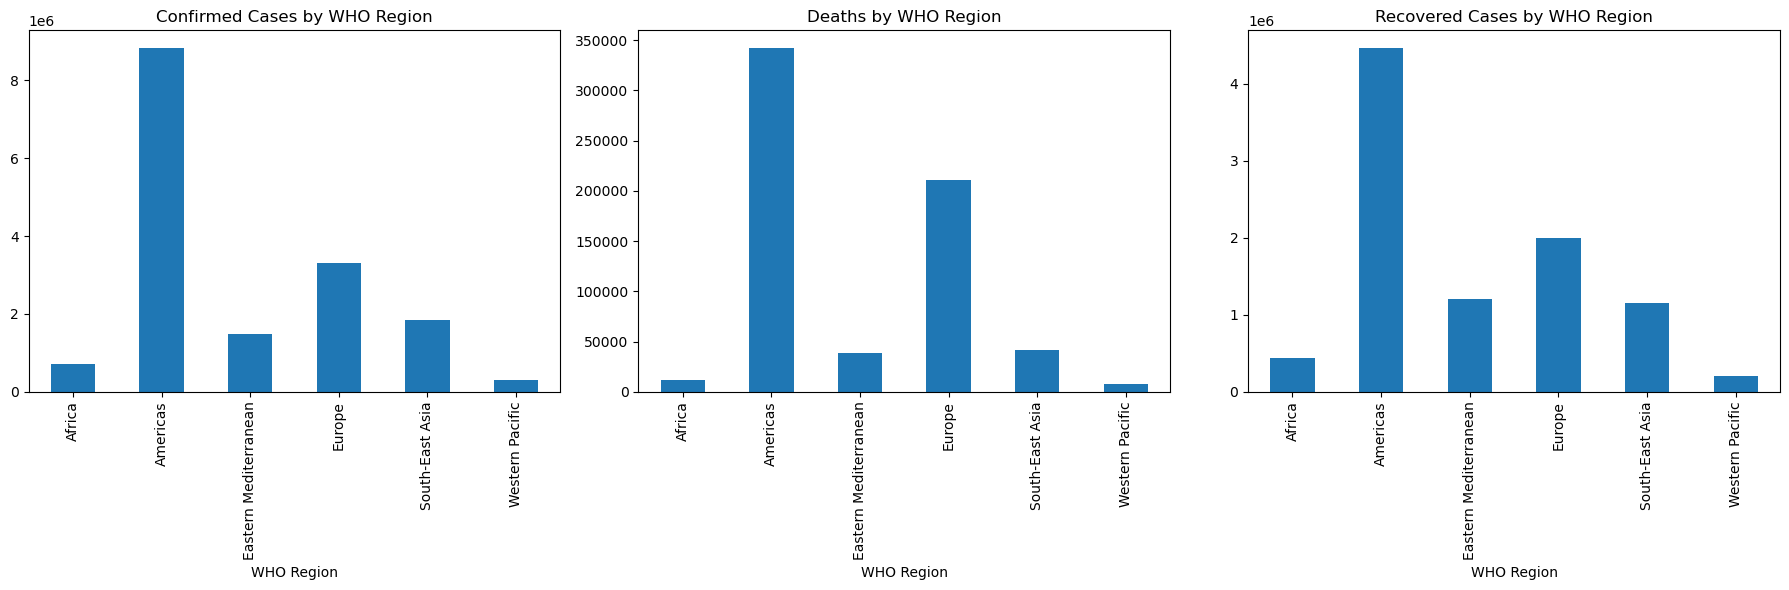

In [171]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
grouped_df['Confirmed'].plot(kind='bar',ax = axes[0], title='Confirmed Cases by WHO Region')
grouped_df['Deaths'].plot(kind='bar',ax = axes[1],title='Deaths by WHO Region')
grouped_df['Recovered'].plot(kind='bar',ax = axes[2], title='Recovered Cases by WHO Region')
plt.tight_layout()
plt.show()


**It is noticed that the Americas has the most Confirmed Cases and deaths and the Western Pacific the least**
### 6.Now, we take the percentages of recovery and death and group by the WHO Region

In [173]:
avg_recovery_death = df.groupby('WHO Region')[['Recovery Percentage', 'Death Percentage']].mean()
avg_recovery_death

,Recovery Percentage,Death Percentage
WHO Region,,
Africa,57.014792,2.306458
Americas,62.291429,3.052571
Eastern Mediterranean,66.593182,3.563182
Europe,68.635000,4.198393
South-East Asia,66.704000,1.296000
Western Pacific,76.805000,1.290000


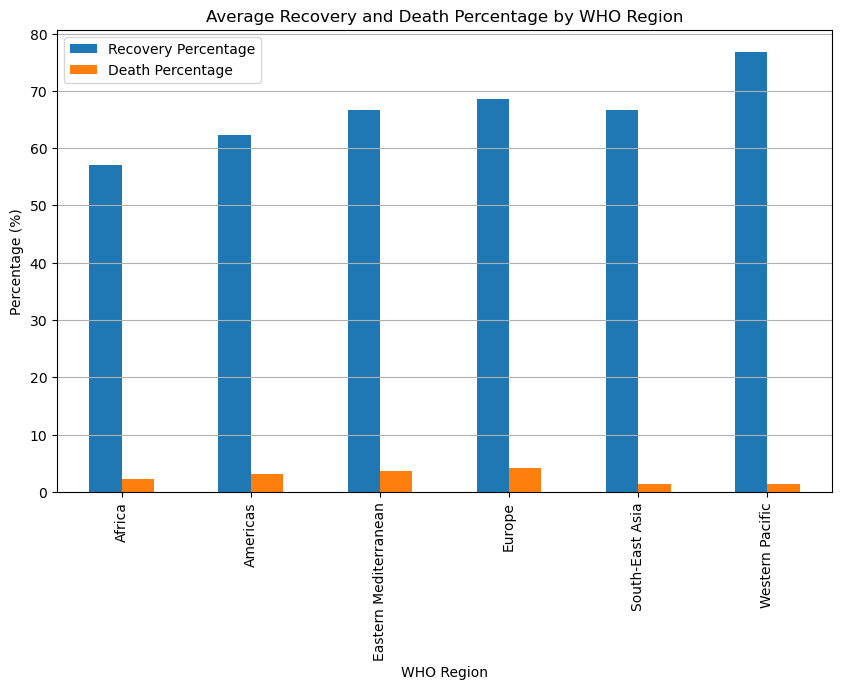

In [174]:
avg_recovery_death.plot(kind='bar', figsize=(10, 6))
plt.title('Average Recovery and Death Percentage by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Percentage (%)')
plt.legend(['Recovery Percentage', 'Death Percentage'])
plt.grid(axis='y')
plt.show()

**It is noticed that the Western Pacific region and Africa has the highest and lowest recovery rates (%) respectively
Also the Western Pacific and Europe has the lowest and highest death rates(%) respectively**


### 7.Grouping the countries by the 'WHO Region' again, we can plot the current active cases against the recovered cases

In [177]:
recovery_active_df = df.groupby('WHO Region')[['Recovered', 'Active']].sum()
recovery_active_df

,Recovered,Active
WHO Region,,
Africa,440645,270339
Americas,4468616,4027938
Eastern Mediterranean,1201400,251005
Europe,1993723,1094656
South-East Asia,1156933,637015
Western Pacific,206770,77409


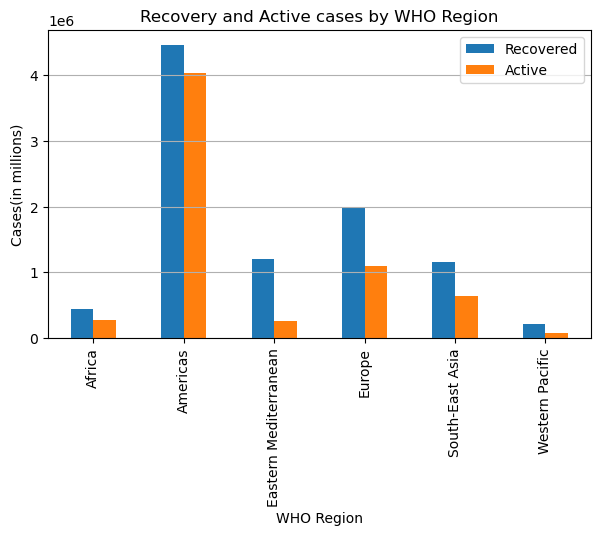

In [178]:
recovery_active_df.plot(kind='bar', figsize=(7, 4))
plt.title('Recovery and Active cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Cases(in millions)')
plt.legend(['Recovered', 'Active'])
plt.grid(axis='y')
plt.show()

**As per the above chart it is noticed that the number of active and recovered cases are high in Americas at exceeding 4 millions while the lowest is in Western Pacific below 0.5 million. And Comparatively the recovering rate of cases are higher than the active one.**